<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Comparison-of-Hi-C-experiments" data-toc-modified-id="Comparison-of-Hi-C-experiments-1">Comparison of Hi-C experiments</a></span><ul class="toc-item"><li><span><a href="#Between-replicates" data-toc-modified-id="Between-replicates-1.1">Between replicates</a></span><ul class="toc-item"><li><span><a href="#Mouse-B-cell" data-toc-modified-id="Mouse-B-cell-1.1.1">Mouse B cell</a></span></li><li><span><a href="#Mouse-PSC" data-toc-modified-id="Mouse-PSC-1.1.2">Mouse PSC</a></span></li></ul></li><li><span><a href="#Between-cell-types" data-toc-modified-id="Between-cell-types-1.2">Between cell types</a></span><ul class="toc-item"><li><span><a href="#replicate-1" data-toc-modified-id="replicate-1-1.2.1">replicate 1</a></span></li><li><span><a href="#replicate-2" data-toc-modified-id="replicate-2-1.2.2">replicate 2</a></span></li></ul></li></ul></li><li><span><a href="#Merge-Hi-C-experiments" data-toc-modified-id="Merge-Hi-C-experiments-2">Merge Hi-C experiments</a></span><ul class="toc-item"><li><span><a href="#Normalizing-merged-data" data-toc-modified-id="Normalizing-merged-data-2.1">Normalizing merged data</a></span></li><li><span><a href="#Save-to-BAM" data-toc-modified-id="Save-to-BAM-2.2">Save to BAM</a></span></li></ul></li></ul></div>

# Comparison of Hi-C experiments

In [1]:
from pytadbit.mapping.analyze import eig_correlate_matrices, correlate_matrices
from pytadbit import load_hic_data_from_reads
from cPickle import load
from matplotlib import pyplot as plt

In [2]:
reso = 200000
base_path = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'
bias_path = 'results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'
bads_path = 'results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'

Write a little function to load HiCData obeject

In [3]:
def my_load_hic_data(cell, rep, reso):
    hic_data = load_hic_data_from_reads(base_path.format(cell, rep), resolution=reso)
    hic_data.bias = load(open(bias_path.format(reso, cell, rep)))
    hic_data.bads = load(open(bads_path.format(reso, cell, rep)))
    return hic_data

## Between replicates

### Mouse B cell

In [4]:
cel1 = 'mouse_B'
cel2 = 'mouse_B'
rep1  = 'rep1'
rep2  = 'rep2'

In [5]:
hic_data1 = my_load_hic_data(cel1, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

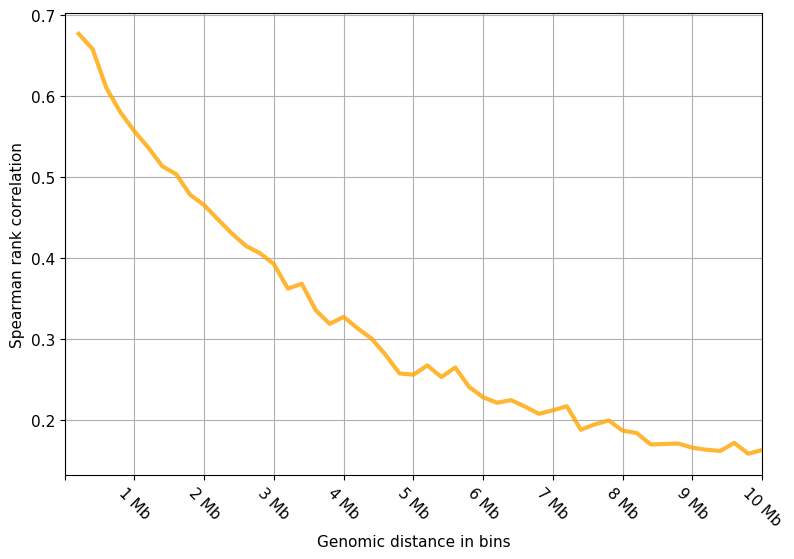

In [6]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe, normalized=True)

In [7]:
hic_data1 = my_load_hic_data(cel1, rep1, 1000000)
hic_data2 = my_load_hic_data(cel1, rep2, 1000000)

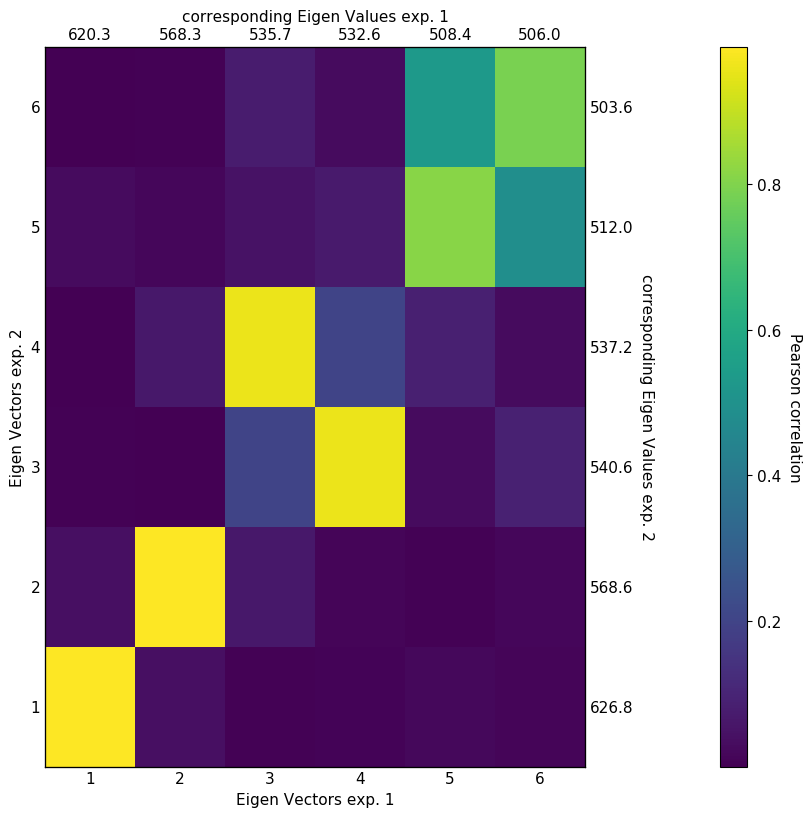

0.989 0.041 0.004 0.009 0.022 0.014

0.042 0.985 0.063 0.013 0.006 0.019

0.007 0.003 0.202 0.960 0.031 0.092

0.002 0.066 0.959 0.201 0.085 0.027

0.028 0.018 0.047 0.072 0.815 0.488

0.000 0.006 0.075 0.031 0.534 0.788



In [8]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### Mouse PSC

In [9]:
cel2 = 'mouse_PSC'
rep1  = 'rep1'
rep2  = 'rep2'

In [10]:
hic_data1 = my_load_hic_data(cel2, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

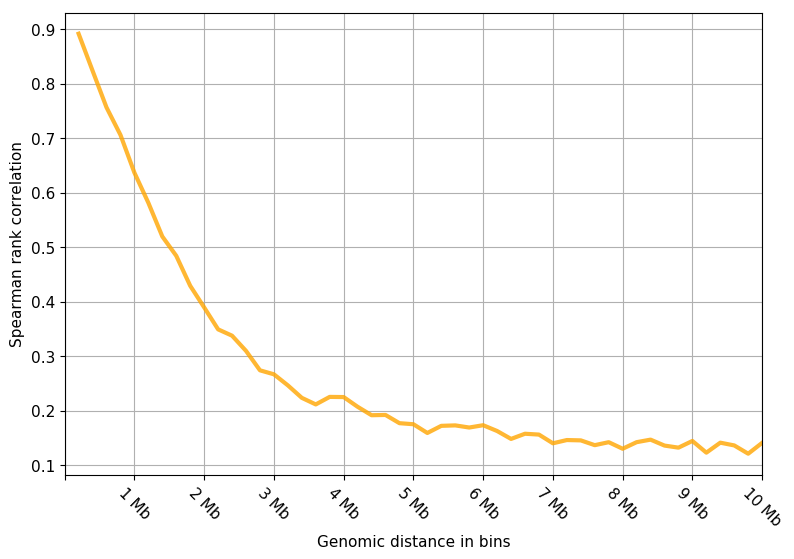

In [11]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [12]:
hic_data1 = my_load_hic_data(cel2, rep1, 1000000)
hic_data2 = my_load_hic_data(cel2, rep2, 1000000)

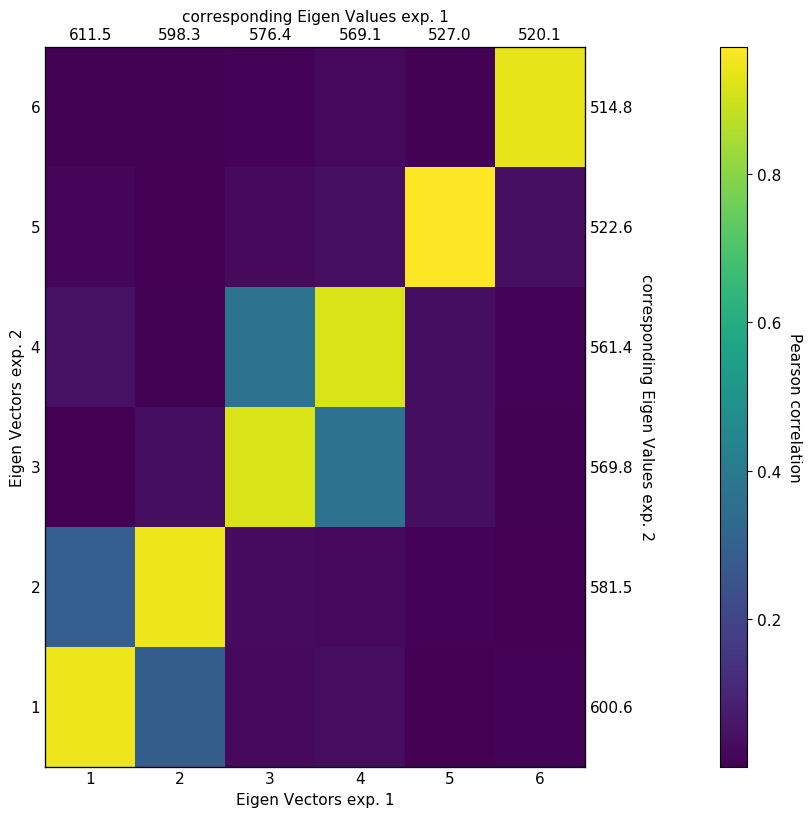

0.947 0.287 0.027 0.035 0.002 0.012

0.291 0.947 0.031 0.021 0.009 0.001

0.001 0.039 0.917 0.371 0.038 0.008

0.044 0.009 0.372 0.917 0.036 0.012

0.013 0.003 0.024 0.040 0.972 0.039

0.007 0.007 0.009 0.024 0.007 0.937



In [13]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

## Between cell types

### replicate 1

In [14]:
hic_data1 = my_load_hic_data(cel1, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep1, reso)

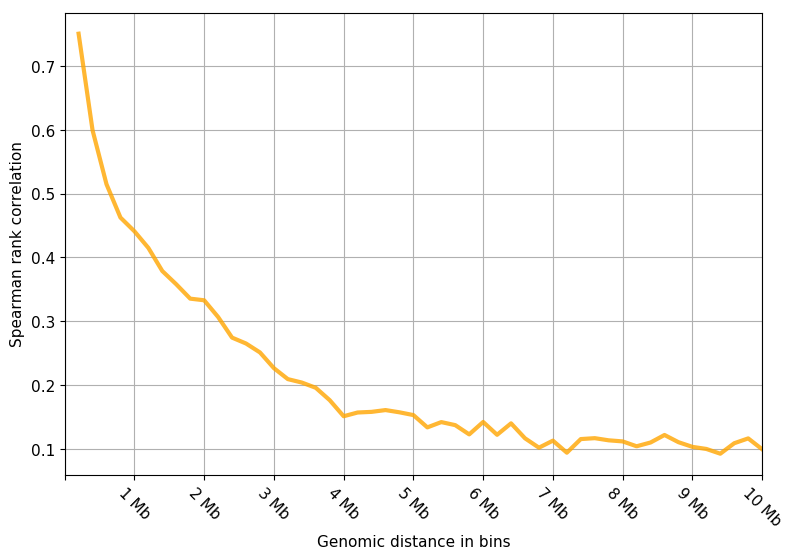

In [15]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [16]:
hic_data1 = my_load_hic_data(cel1, rep1, 1000000)
hic_data2 = my_load_hic_data(cel2, rep1, 1000000)

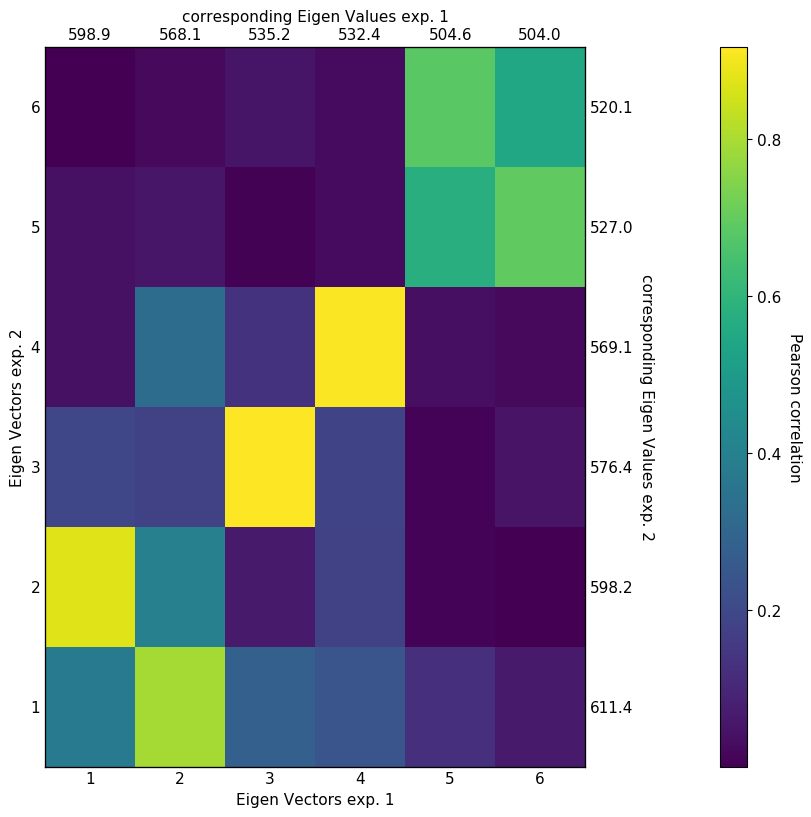

0.379 0.794 0.281 0.243 0.124 0.066

0.873 0.400 0.067 0.182 0.011 0.002

0.195 0.183 0.917 0.190 0.008 0.049

0.042 0.323 0.134 0.913 0.040 0.025

0.041 0.057 0.008 0.026 0.576 0.693

0.001 0.024 0.053 0.028 0.685 0.547



In [17]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### replicate 2

In [18]:
hic_data1 = my_load_hic_data(cel1, rep2, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

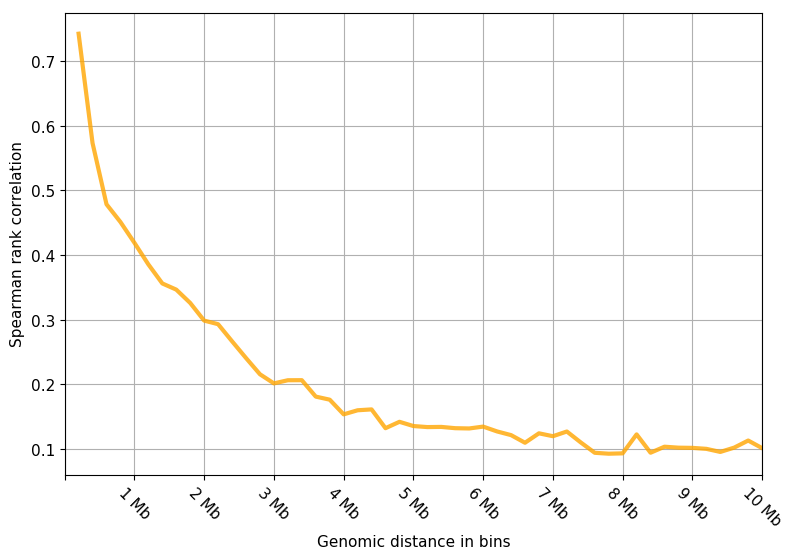

In [19]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [20]:
hic_data1 = my_load_hic_data(cel1, rep2, 1000000)
hic_data2 = my_load_hic_data(cel2, rep2, 1000000)

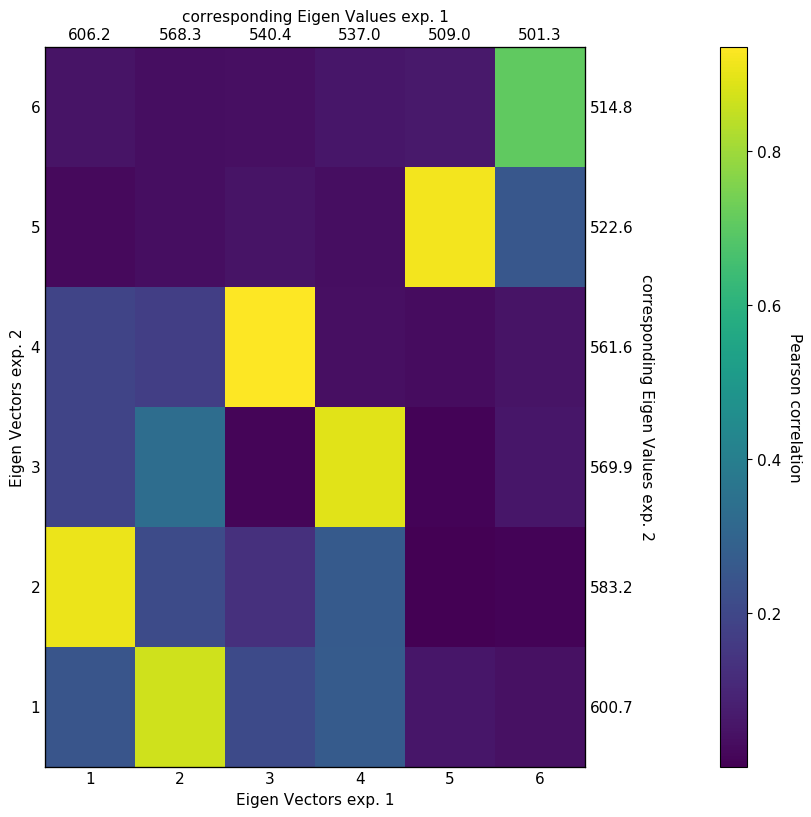

0.247 0.866 0.210 0.269 0.058 0.044

0.908 0.215 0.129 0.267 0.000 0.009

0.194 0.336 0.014 0.893 0.009 0.059

0.192 0.173 0.936 0.040 0.032 0.051

0.023 0.036 0.048 0.036 0.919 0.253

0.051 0.036 0.038 0.056 0.065 0.706



In [21]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

# Merge Hi-C experiments

Once agreed that experiments are similar, they can be merged.

Here is a simple way to merge valid pairs. Arguably we may want to merge unfiltered data but the difference would be minimal specially with non-replicates.

In [22]:
from pytadbit.mapping import merge_2d_beds

In [23]:
! mkdir -p results/fragment/mouse_B_both/
! mkdir -p results/fragment/mouse_PSC_both/
! mkdir -p results/fragment/mouse_B_both/03_filtering/
! mkdir -p results/fragment/mouse_PSC_both/03_filtering/

In [24]:
cell = 'mouse_B'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell)

merge_2d_beds(hic_data1, hic_data2, hic_data)

12526029

In [25]:
cell = 'mouse_PSC'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell)

merge_2d_beds(hic_data1, hic_data2, hic_data)

13976340

## Normalizing merged data

In [26]:
from pytadbit.mapping.analyze import hic_map
from cPickle import dump

In [27]:
! mkdir -p results/fragment/both_mouse_B/04_normalizing
! mkdir -p results/fragment/both_mouse_PSC/04_normalizing

All in one loop to:
 - filter
 - normalize
 - generate intra-chromosome and genomic matrices

all at diferent resolutions, and for both time points

In [ ]:
for cell in ['mouse_B', 'mouse_PSC']:
    print ' -', cell
    for reso in [1000000, 200000, 100000]:
        print '   *', reso
        # load hic_data
        hic_data = load_hic_data_from_reads(
            'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell),
            reso)
        # filter columns
        hic_data.filter_columns(draw_hist=False, min_count=10, by_mean=True)
        # normalize
        hic_data.normalize_hic(iterations=0)
        # save biases to reconstruct normalization
        out = open('results/fragment/{1}_both/04_normalizing/biases_{0}_{1}.pick'.format(reso, cell), 'w')
        dump(hic_data.bias, out)
        out.close()
        # save filtered out columns
        out = open('results/fragment/{1}_both/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, cell), 'w')
        dump(hic_data.bads, out)
        out.close()
        # save data as raw matrix per chromsome
        hic_map(hic_data, by_chrom='intra', normalized=False,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_raw'.format(reso, cell))
        # save data as normalized matrix per chromosome
        hic_map(hic_data, by_chrom='intra', normalized=True,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_norm'.format(reso, cell))
        # if the resolution is low save the full genomic matrix
        if reso > 500000:
            hic_map(hic_data, by_chrom=False, normalized=False, 
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_raw.png'.format(reso, cell),
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_raw.mat'.format(reso, cell))

            hic_map(hic_data, by_chrom=False, normalized=True,
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_norm.png'.format(reso, cell) ,
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_norm.mat'.format(reso, cell))

 - mouse_B
   * 200000



     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15   112   113   114   329   330
   331   332   337   338   339   342   343   344   345   346   960   978   979   980   981   982   983   984   985   986
   987   988   989   990   991   992   993  1494  1855  1856  1857  1858  1859  1860  1861  1890  1891  1892  1893  1894
  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  2075  2076  2093  2436  2437  2438  2690  2691  2692  2693
  2694  2695  2696  2697  2698  2699  2700  2701  2702  2703  2704  2705  2901  2902  2903  2904  2996  2997  2998  3000
  3001  3190  3252  3299  3300  3301  3302  3341  3343  3344  3345  3347  3348  3401  3402  3403  3408  3420  3422  3473
  3474  3475  3476  3477  3478  3479  3480  3481  3482  3483  3484  3485  3486  3487  3488  3550  3551  3943  3944  3945
  3946  3947  3948  3949  3950  3952  4131  4132  4133  4134  4135  4233  4234  4235  4236  4237  4238  4239  4240  4241
  4242  4243  4244  4245  4246 

Found 1156 of 13641 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13623.314
  - rescaling biases


## Save to BAM

TADbit works with both formats TSV and BAM, however it is recommended to work with BAM as these files are indexed and are much more efficient.

In [29]:
from pytadbit.parsers.hic_bam_parser import bed2D_to_BAMhic

In [32]:
for cell in ['mouse_B', 'mouse_PSC']:
    print cell
    bed2D_to_BAMhic('results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell), 
                    valid=True, ncpus=8, 
                    outbam='results/fragment/{0}_both/03_filtering/valid_reads12_{0}'.format(cell), 
                    frmt='mid', masked=None)

mouse_B
mouse_PSC
